# Analysis of results of pyKNEEr with comparison to literature or ground truth
Content under Creative Commons Attribution license CC-BY-NC-SA 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

Analysis of:
- [Dice coefficient](#dice)
- [Surface distance](#surfaceDistance)
- [Cartilage thickness](#cartilageThickness)
- [Cartilage volume](#cartilageVolume)
- [$T_{2}$ mapping](#T2mapping)

## Import packages

In [1]:
# use R to create the plot using ggplot2
import os # comment if used in mybinder, uncomment if used locally
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # comment if used in mybinder, uncomment if used locally

In [2]:
#%%R
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("ggrepel", repos='http://cran.us.r-project.org', quiet=TRUE)

In [3]:
%load_ext rpy2.ipython

In [4]:
# use python's libraries for calculations
import numpy  as np
import pandas as pd
#from plotnine import *
import scipy
from scipy.stats.stats import pearsonr

In [5]:
# to visualize tables side by side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

___

## DICE COEFFICIENT <a name="dice"></a>

In [6]:
# Load table of overlap coefficients and select dice coeff
def get_coeff (filename): 
    
    # load file
    overlap_coeff = pd.read_csv(filename)
    # start indeces from 1
    overlap_coeff.index = np.arange(1,len(overlap_coeff)+1)
    
    # get dice coeff
    dice = overlap_coeff[["dice_coeff"]]
    
    # get index of failed segmentation
    index_failed    = dice[dice["dice_coeff"]  < 0.60].index.tolist() # remove failed segmentations
    # get index of reference image (if present)
    index_reference = dice[dice["dice_coeff"] == 1.00].index.tolist() # remove reference
    # combine indexes of failed segmentation and reference image  
    index_excluded  = index_failed + index_reference 
    # display items to be excluded  
    print ("Excluded rows are:") 
    display(dice.loc[index_excluded,:])
    
    # remove the rows of failed segmentations and reference image 
    dice = dice.drop(index_excluded);
    
    return dice, index_excluded

### Load files

In [7]:
# OAI1 - DESS
filename_OAI1_DESS_coeff = "./overlapCoeff_OAI1_DESS.csv"
dice_OAI1_DESS, index_excluded_OAI1_DESS = get_coeff(filename_OAI1_DESS_coeff)

Excluded rows are:


,dice_coeff
6,0.05
9,1.00


In [8]:
# OAI1 - T2
filename_OAI1_T2_coeff = "./overlapCoeff_OAI1_T2_0.csv"
dice_OAI1_T2, index_excluded_OAI1_T2 = get_coeff(filename_OAI1_T2_coeff)

Excluded rows are:


,dice_coeff
6,0.05


In [9]:
# OAI2 - BL
filename_OAI2_BL_coeff = "./overlapCoeff_OAI2_BL.csv"
dice_OAI2_BL, index_excluded_OAI2_BL = get_coeff(filename_OAI2_BL_coeff)

Excluded rows are:


,dice_coeff
6,0.01
24,0.34
31,0.57


In [10]:
# OAI2 - FU
filename_OAI2_FU_coeff = "./overlapCoeff_OAI2_FU.csv"
dice_OAI2_FU, index_excluded_OAI2_FU = get_coeff(filename_OAI2_FU_coeff)

Excluded rows are:


,dice_coeff
6,0.01
24,0.34
31,0.56
57,0.41
84,0.59


### Descriptive statistics of dice coefficient

In [11]:
# change the column names for nicer display
dice_OAI1_DESS_disp = dice_OAI1_DESS.copy()
dice_OAI1_DESS_disp.rename(columns={"dice_coeff": "dice_coeff_OAI1_DESS"}, inplace=True) # rename column
dice_OAI1_T2_disp = dice_OAI1_T2.copy()
dice_OAI1_T2_disp.rename(columns={"dice_coeff": "dice_coeff_OAI1_T2"}, inplace=True) # rename column
dice_OAI2_BL_disp = dice_OAI2_BL.copy()
dice_OAI2_BL_disp.rename(columns={"dice_coeff": "dice_coeff_OAI2_BL"}, inplace=True) # rename column
dice_OAI2_FU_disp = dice_OAI2_FU.copy()
dice_OAI2_FU_disp.rename(columns={"dice_coeff": "dice_coeff_OAI2_FU"}, inplace=True) # rename column

In [12]:
# display stats
display_side_by_side(dice_OAI1_DESS_disp.describe().round(2),
                     dice_OAI1_T2_disp.describe().round(2), 
                     dice_OAI2_BL_disp.describe().round(2),
                     dice_OAI2_FU_disp.describe().round(2))

,dice_coeff_OAI1_DESS
count,17.00
mean,0.86
std,0.02
min,0.81
25%,0.86
50%,0.87
75%,0.88
max,0.89
,dice_coeff_OAI1_T2
count,18.00


### Visualization

In [13]:
# add the column with the name of the dataset
dice_OAI1_DESS_vis = dice_OAI1_DESS.copy()
dice_OAI1_DESS_vis.insert(1, "dataset", "OAI1-DESS", allow_duplicates=False)
dice_OAI1_T2_vis = dice_OAI1_T2.copy()
dice_OAI1_T2_vis.insert(1, "dataset", "OAI1-T2", allow_duplicates=False)
dice_OAI2_BL_vis = dice_OAI2_BL.copy()
dice_OAI2_BL_vis.insert(1, "dataset", "OAI2-BL", allow_duplicates=False)
dice_OAI2_FU_vis = dice_OAI2_FU.copy()
dice_OAI2_FU_vis.insert(1, "dataset", "OAI2-FU", allow_duplicates=False)

# concatenate to one table
dice = pd.concat([dice_OAI1_DESS_vis, dice_OAI1_T2_vis, dice_OAI2_BL_vis, dice_OAI2_FU_vis],axis=0)

In [14]:
%%R
# font size for all graphs
title_font_size        <- 10
label_font_size        <- 8
legend_title_font_size <- 6
legend_font_size       <- 5

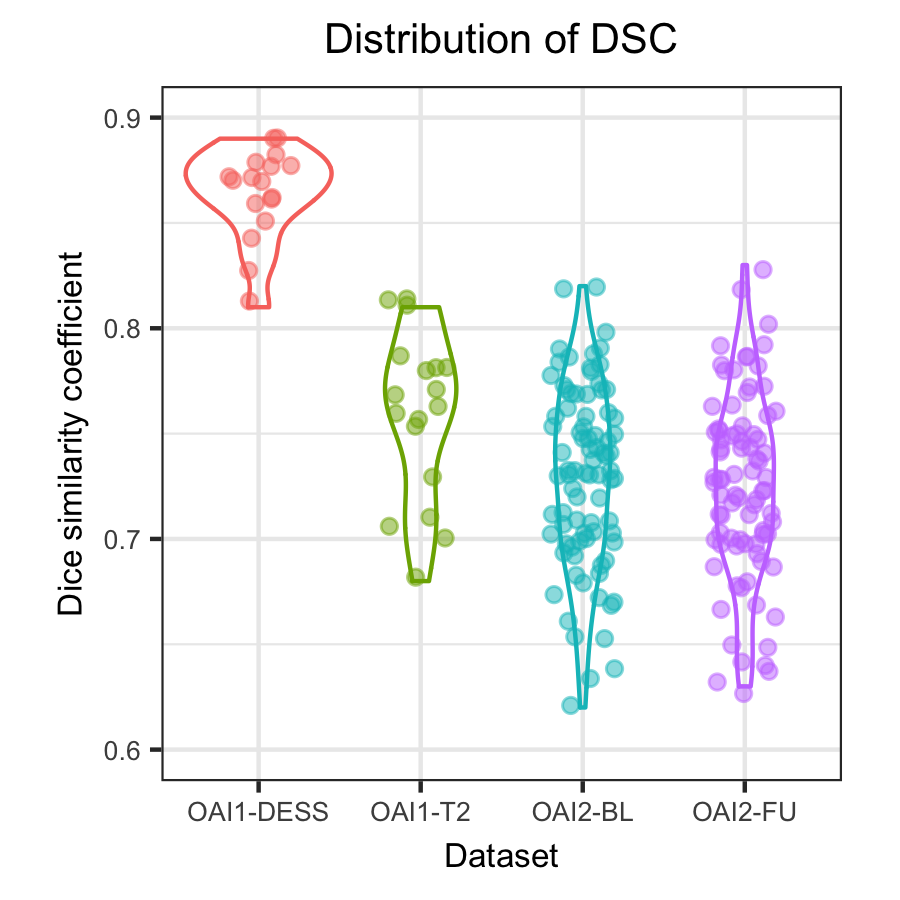

In [15]:
%%R -i dice -w 3 -h 3 --units in -r 300
library(ggplot2)

plot_dice <- ggplot(dice,aes(x=dataset, y=dice_coeff, color=dataset)) + 
             geom_violin(scale = "area", fill=NaN) +  #size=1)#, fill=[])   
             geom_jitter(width=0.2, alpha=0.5) + 
             # background
             theme_bw() +
             coord_fixed(ratio = 13) +
             # title   
             ggtitle("Distribution of DSC") +
             theme(plot.title = element_text(size = title_font_size, hjust = 0.5)) +  # title font size + title to center
             # labels and thicks
             xlab("Dataset") + 
             scale_y_continuous(name="Dice similarity coefficient", limits=c(0.60, 0.90)) + 
             theme(text = element_text(size = label_font_size)) +  # label and tick font size   
             # legend off    
             scale_color_discrete(guide=FALSE)                
plot_dice

In [16]:
# save plot
# %%R # comment if used in mybinder, uncomment if used locally
# ggsave("fig_dice.pdf", plot = last_plot(), height=3, width=3, dpi=300) # comment if used in mybinder, uncomment if used locally

### Comparison to literature

In [17]:
# load literature table
file_name = "./cart_segm_literature.csv"
literature = pd.read_csv(file_name) 
# get only the columns "author_1", "overlap_location", "dice_average", "VOE", "n_of_subjects_validation"
coeff = literature.loc[:, ["overlap_location", "dice_average", "VOE", "n_of_subjects_validation", "algorithm_type", "bibtex_id"]]
# rename columns for graph legend
coeff.rename(columns={"overlap_location": "overlap"}, inplace=True)
coeff.rename(columns={"algorithm_type": "algorithm"}, inplace=True)
# put year in bibtex_id in brackets
coeff["bibtex_id"] = coeff["bibtex_id"].str.replace("_", " (")
coeff["bibtex_id"] = coeff["bibtex_id"] + ")"
# make sure dice_average and VOE are numbers
coeff[["dice_average"]] = coeff[["dice_average"]].apply(pd.to_numeric)
coeff[["VOE"]] = coeff[["VOE"]].apply(pd.to_numeric)
# get only the rows with DSC or VOE
coeff = coeff[~coeff.dice_average.isnull() | ~coeff.VOE.isnull()]
# where there is VOE but not dice, calculate dice using the formula [22] by Shan et al. 2014: dice = (200 - 2*VOE) / (200-VOE)
coeff.dice_average[coeff.dice_average.isnull() & ~coeff.VOE.isnull()] = (200 - 2*coeff.VOE) / (200-coeff.VOE)
# add data for pyKNEEr
pykneer_average_OAI1 = (dice_OAI1_DESS.mean()[0] + dice_OAI1_T2.mean()[0]) / 2
pykneer_count_OAI1   = dice_OAI1_DESS.count()[0] + dice_OAI1_T2.count()[0] 
pykneer_average_OAI2 = (dice_OAI2_BL.mean()[0] + dice_OAI2_FU.mean()[0]) / 2
pykneer_count_OAI2   =  dice_OAI2_BL.count()[0] + dice_OAI2_FU.count()[0]
coeff.loc[coeff.index.max()+1] = ["global", pykneer_average_OAI1, 0, pykneer_count_OAI1, "atlas-based", "pyKNEEr_OAI1"]
coeff.loc[coeff.index.max()+1] = ["global", pykneer_average_OAI2, 0, pykneer_count_OAI2, "atlas-based", "pyKNEEr_OAI2"]
# sort table to split labeling to left and right
coeff = coeff.sort_values(by=["dice_average"])
# display 
display (coeff)

,overlap,dice_average,VOE,n_of_subjects_validation,algorithm,bibtex_id
3,local,0.636673,53.30,40,active contours,Amberg (2010)
24,local,0.717000,28.30,50,hybrid,LeeJG (2014)
30,global,0.727057,0.00,168,atlas-based,pyKNEEr_OAI2
13,local,0.770000,NaN,114,machine learning,Folkesson (2007)
1,local,0.778253,36.30,40,active contours,Vincent (2011)
19,local,0.790000,NaN,120,deep learning,Norman (2018)
8,global,0.790000,NaN,23,graph-based,Ozturk (2016)
27,global,0.795181,34.00,40,hybrid,Seim (2010)
23,local,0.799520,33.40,50,hybrid,WangZ (2013)
20,global,0.806000,31.70,20,deep learning,Zhou (2018)


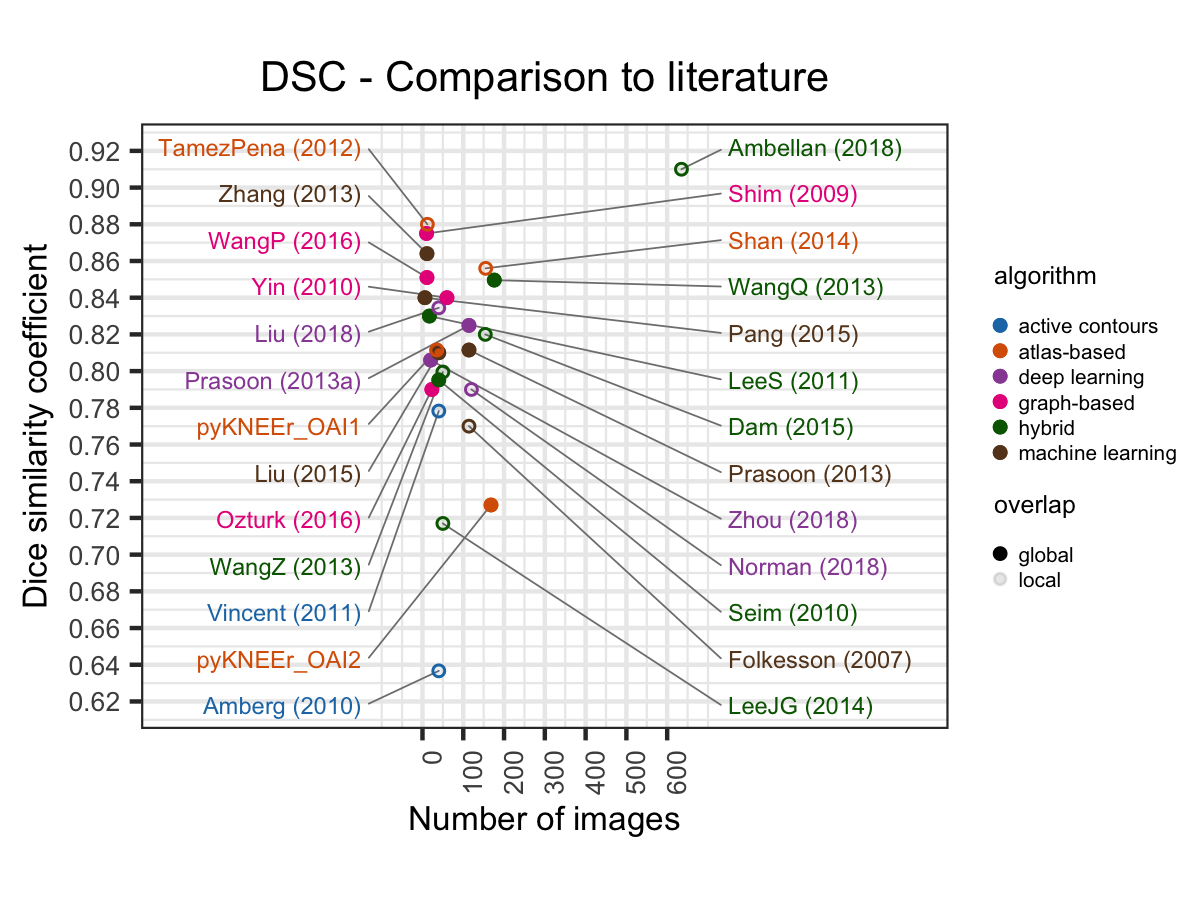

In [18]:
%%R -i coeff -w 4 -h 3 --units in -r 300

library(ggplot2)
library(ggrepel)
seq(1,10,2)
# plot_coeff <- (ggplot(coeff, aes(x=n_of_subjects_validation, y=dice_average)))
plot_coeff <- (ggplot(coeff, aes(x=n_of_subjects_validation, y=dice_average, color=algorithm, label = bibtex_id)) + 
               # graph ratio and limits
               coord_fixed(ratio = 4500, xlim = c(-600,1200), ylim = c(0.62,0.92)) + 
               # authors' names
               geom_text_repel(data          = coeff[seq(1,nrow(coeff),2),],
                               size          = 2,  
                               show_guide    = FALSE, # do not show (a) in legend
                               nudge_x       = -150 - coeff[seq(1,nrow(coeff),2),]$n_of_subjects_validation, # align text at this position
                               segment.size  = 0.2,
                               segment.color = "grey50",
                               direction     = "y",
                               hjust         = 1 # align text to the right
                              ) + 
               geom_text_repel(aes(label = bibtex_id), 
                               data          = coeff[seq(2,nrow(coeff),2),],
                               size          = 2,  
                               show_guide    = FALSE,
                               nudge_x       = 750 - coeff[seq(2,nrow(coeff),2),]$n_of_subjects_validation,
                               segment.size  = 0.2,
                               segment.color = "grey50",
                               direction     = "y",
                               hjust         = 0
                              ) + 
               # data
               geom_point(aes(color=algorithm, fill=algorithm, alpha=as.character(overlap)), size=1) +
               scale_alpha_manual(values=c("global"=1, "local"=0.1)) + # different alpha based on overlap
               geom_point(size=1, shape=21) + # used to overlap the original points that got transparent because of overlap's alpha; shape 1 is an empty circle
               # color palette
               scale_colour_manual(values = c("#1f78b4", "#d95f02", "#984ea3","#e7298a", "#006400", "#654321" )) + # modified from Dark2
               # background
               theme_bw() + # white background with grid lines
               # axis
               xlab("Number of images") +
               ylab("Dice similarity coefficient") +
               theme(text = element_text(size=label_font_size),
                    axis.text.x = element_text(angle = 90, hjust = 1)
                    ) + 
               scale_x_continuous(breaks = seq(0, 650, by=100)) +
               scale_y_continuous(breaks = seq(0.62, 0.92, by=0.02)) +
               # title
               ggtitle("DSC - Comparison to literature") +
               theme(plot.title = element_text(size=title_font_size, hjust = 0.5)) +  # title font size + title to center
               # legend 
               theme(#legend.position  = c(0.82, 0.35), # position inside graph
                     legend.title     = element_text(size=legend_title_font_size), # title font size
                     legend.text      = element_text(size=legend_font_size),       # text font size
                     legend.key.size  = unit(0.015,"in"),                          # legend size
                     legend.margin    = margin(0,0,0,0, unit="cm"),                # legend margin
                     legend.spacing.y = unit(0.2, "cm")) +                         # spacing between the two legends
               labs(alpha="overlap")                                               # change title of legend "overlap" (it was as.character(overlap))
               ) 

# display plot
plot_coeff

*Note*: The above graph has been corrected for the second version of the preprint paper

___

## SURFACE DISTANCE <a name="surfaceDistance"></a>
Note: This part has been added because requested by peer-review in PLOS One

In [19]:
# Load table of mean distances and select mean distances
def get_distances (filename, index_excluded): 
    
    # load file
    all_values = pd.read_csv(filename)
    # start indeces from 1
    all_values.index = np.arange(1,len(all_values)+1)
    
    # get mean_distances
    mean_distances = all_values[["mean_distances"]] 
    display(mean_distances.loc[index_excluded,:])
    
    # remove the rows of failed segmentations and reference image 
    mean_distances = mean_distances.drop(index_excluded);
    
    return mean_distances

In [20]:
# OAI1 - DESS
filename_OAI1_DESS_dist = "./average_distances_OAI1_DESS.csv"
dist_OAI1_DESS = get_distances(filename_OAI1_DESS_dist, index_excluded_OAI1_DESS)

,mean_distances
6,28.14
9,0.00


In [21]:
# OAI1 - T2
filename_OAI1_T2_dist = "./average_distances_OAI1_T2_0.csv"
dist_OAI1_T2 = get_distances(filename_OAI1_T2_dist, index_excluded_OAI1_T2)

,mean_distances
6,27.8


In [22]:
# OAI2 - BL
filename_OAI2_BL_dist = "./average_distances_OAI2_BL.csv"
dist_OAI2_BL = get_distances(filename_OAI2_BL_dist, index_excluded_OAI2_BL)

,mean_distances
6,60.98
24,5.49
31,8.18


In [23]:
# OAI2 - FU
filename_OAI2_FU_dist = "./average_distances_OAI2_FU.csv"
dist_OAI2_FU = get_distances(filename_OAI2_FU_dist, index_excluded_OAI2_FU)

,mean_distances
6,61.36
24,5.58
31,8.06
57,4.49
84,2.81


In [24]:
# change the column names for nicer display
dist_OAI1_DESS_disp = dist_OAI1_DESS.copy()
dist_OAI1_DESS_disp.rename(columns={"mean_distances": "dist_OAI1_DESS"}, inplace=True) # rename column
dist_OAI1_T2_disp = dist_OAI1_T2.copy()
dist_OAI1_T2_disp.rename(columns={"mean_distances": "dist_OAI1_T2"}, inplace=True) # rename column
dist_OAI2_BL_disp = dist_OAI2_BL.copy()
dist_OAI2_BL_disp.rename(columns={"mean_distances": "dist_OAI2_BL"}, inplace=True) # rename column
dist_OAI2_FU_disp = dist_OAI2_FU.copy()
dist_OAI2_FU_disp.rename(columns={"mean_distances": "dist_OAI2_FU"}, inplace=True) # rename column

In [25]:
# display stats
display_side_by_side(dist_OAI1_DESS_disp.describe().round(2),
                     dist_OAI1_T2_disp.describe().round(2), 
                     dist_OAI2_BL_disp.describe().round(2),
                     dist_OAI2_FU_disp.describe().round(2))

,dist_OAI1_DESS
count,17.00
mean,0.60
std,0.12
min,0.43
25%,0.55
50%,0.58
75%,0.64
max,0.86
,dist_OAI1_T2
count,18.00


---

## CARTILAGE THICKNESS <a name="cartilageThickness"></a>

In [26]:
def get_thickness(fileName, index_excluded):
       
    # load file
    thickness = pd.read_csv(fileName)
    
    # start indeces from 1
    thickness.index = np.arange(1,len(thickness)+1)
        
    # remove the rows of failed segmentations and reference image 
    thickness = thickness.drop(index_excluded);
    
    # remove column with standard deviation
    thickness = thickness[["averageThickness"]]
    
    return thickness

### Load files

In [27]:
# OAI1 - DESS
filename_OAI1_DESS_th = "./thickness_OAI1_DESS.csv"
thickness_OAI1_DESS = get_thickness(filename_OAI1_DESS_th, index_excluded_OAI1_DESS)
# OAI1 - DESS_QM (ground truth)
filename_OAI1_DESS_QM_th = "./thickness_OAI1_DESS_QM.csv"
thickness_OAI1_DESS_QM = get_thickness(filename_OAI1_DESS_QM_th, index_excluded_OAI1_DESS)
# OAI1 - T2
filename_OAI1_T2_th = "./thickness_OAI1_T2_0.csv"
thickness_OAI1_T2 = get_thickness(filename_OAI1_T2_th, index_excluded_OAI1_T2)
# OAI1 - T2_QM (ground truth)
filename_OAI1_T2_QM_th = "./thickness_OAI1_T2_QM.csv"
thickness_OAI1_T2_QM = get_thickness(filename_OAI1_T2_QM_th, index_excluded_OAI1_T2)
# OAI2 - Baseline
filename_OAI2_BL_th = "./thickness_OAI2_BL.csv"
thickness_OAI2_BL = get_thickness(filename_OAI2_BL_th, index_excluded_OAI2_BL)
# OAI2 - Baseline_IM (ground truth)
filename_OAI2_BL_IM_th = "./thickness_OAI2_BL_IM.csv"
thickness_OAI2_BL_IM = get_thickness(filename_OAI2_BL_IM_th, index_excluded_OAI2_BL)
# OAI2 - Followup
filename_OAI2_FU_th = "./thickness_OAI2_FU.csv"
thickness_OAI2_FU = get_thickness(filename_OAI2_FU_th, index_excluded_OAI2_FU)
# OAI2 - Followup_IM (ground truth)
filename_OAI2_FU_IM_th = "./thickness_OAI2_FU_IM.csv"
thickness_OAI2_FU_IM = get_thickness(filename_OAI2_FU_IM_th, index_excluded_OAI2_FU)

### Descriptive statistics of cartilage thickness 

In [28]:
# change the column names for nicer display
thickness_OAI1_DESS_disp = thickness_OAI1_DESS.copy()
thickness_OAI1_DESS_disp.rename(columns={"averageThickness": "OAI1_DESS"} , inplace=True) # rename column
thickness_OAI1_DESS_QM_disp = thickness_OAI1_DESS_QM.copy()
thickness_OAI1_DESS_QM_disp.rename(columns={"averageThickness": "OAI1_DESS_QM"} , inplace=True) # rename column
thickness_OAI1_T2_disp = thickness_OAI1_T2.copy()
thickness_OAI1_T2_disp.rename(columns={"averageThickness": "OAI1_T2"} , inplace=True) # rename column
thickness_OAI1_T2_QM_disp = thickness_OAI1_T2_QM.copy()
thickness_OAI1_T2_QM_disp.rename(columns={"averageThickness": "OAI1_T2_QM"} , inplace=True) # rename column
thickness_OAI2_BL_disp = thickness_OAI2_BL.copy()
thickness_OAI2_BL_disp.rename(columns={"averageThickness": "OAI2_BL"} , inplace=True) # rename column
thickness_OAI2_BL_IM_disp = thickness_OAI2_BL_IM.copy()
thickness_OAI2_BL_IM_disp.rename(columns={"averageThickness": "OAI2_BL_IM"} , inplace=True) # rename column
thickness_OAI2_FU_disp = thickness_OAI2_FU.copy()
thickness_OAI2_FU_disp.rename(columns={"averageThickness": "OAI2_FU"} , inplace=True) # rename column
thickness_OAI2_FU_IM_disp = thickness_OAI2_FU_IM.copy()
thickness_OAI2_FU_IM_disp.rename(columns={"averageThickness": "OAI2_FU_IM"} , inplace=True) # rename column

In [29]:
display_side_by_side(thickness_OAI1_DESS_disp.describe().round(2),
                     thickness_OAI1_DESS_QM_disp.describe().round(2),
                     thickness_OAI1_T2_disp.describe().round(2),
                     thickness_OAI1_T2_QM_disp.describe().round(2))
display_side_by_side(thickness_OAI2_BL_disp.describe().round(2),
                     thickness_OAI2_BL_IM_disp.describe().round(2),
                     thickness_OAI2_FU_disp.describe().round(2),
                     thickness_OAI2_FU_IM_disp.describe().round(2))

,OAI1_DESS
count,17.00
mean,2.17
std,0.16
min,1.94
25%,2.05
50%,2.18
75%,2.25
max,2.50
,OAI1_DESS_QM
count,17.00


,OAI2_BL
count,85.00
mean,2.03
std,0.20
min,1.57
25%,1.91
50%,2.03
75%,2.15
max,2.55
,OAI2_BL_IM
count,85.00


### Correlation between analyzed data and ground truth data

In [30]:
def persons_coeff_th(thickness_pk, thickness_gt):
    
    # convert table columns to lists
    thickness_pk_list = thickness_pk["averageThickness"].tolist() # pk = pyKNEEr
    thickness_gt_list = thickness_gt["averageThickness"].tolist() # gt = ground truth

    # calculate Pearson's coefficient
    [pearsons, pvalue] = scipy.stats.pearsonr(thickness_pk_list, thickness_gt_list)
    print("Person's coefficient is %.2f" % round(pearsons,2))
    
    return pearsons
    

In [31]:
pearsons_OAI1_DESS_th = persons_coeff_th(thickness_OAI1_DESS, thickness_OAI1_DESS_QM)
pearsons_OAI1_T2_th   = persons_coeff_th(thickness_OAI1_T2,   thickness_OAI1_T2_QM)
pearsons_OAI2_BL_th   = persons_coeff_th(thickness_OAI2_BL,   thickness_OAI2_BL_IM)
pearsons_OAI2_FU_th   = persons_coeff_th(thickness_OAI2_FU,   thickness_OAI2_FU_IM)

Person's coefficient is 0.96
Person's coefficient is 0.67
Person's coefficient is 0.65
Person's coefficient is 0.68


### Visualization

In [32]:
# OAI1 - DESS
# add the column with the name of the dataset
thickness_OAI1_DESS_vis = thickness_OAI1_DESS.copy()
thickness_OAI1_DESS_vis.rename(columns={"averageThickness": "averageThickness_pk"} , inplace=True)
thickness_OAI1_DESS_QM_vis = thickness_OAI1_DESS_QM.copy()
thickness_OAI1_DESS_QM_vis.rename(columns={"averageThickness": "averageThickness_gt"} , inplace=True)
# concatenate
OAI1_DESS = pd.concat([thickness_OAI1_DESS_vis[["averageThickness_pk"]], thickness_OAI1_DESS_QM_vis[["averageThickness_gt"]]], axis = 1)
# add label column
OAI1_DESS.insert(2, "dataset", "OAI1-DESS", allow_duplicates=False)

# OAI1 - T2
thickness_OAI1_T2_vis = thickness_OAI1_T2.copy()
thickness_OAI1_T2_vis.rename(columns={"averageThickness": "averageThickness_pk"} , inplace=True)
thickness_OAI1_T2_QM_vis = thickness_OAI1_T2_QM.copy()
thickness_OAI1_T2_QM_vis.rename(columns={"averageThickness": "averageThickness_gt"} , inplace=True)
OAI1_T2 = pd.concat([thickness_OAI1_T2_vis[["averageThickness_pk"]], thickness_OAI1_T2_QM_vis[["averageThickness_gt"]]], axis = 1)
OAI1_T2.insert(2, "dataset", "OAI1-T2", allow_duplicates=False)

# OAI2 - BL
thickness_OAI2_BL_vis = thickness_OAI2_BL.copy()
thickness_OAI2_BL_vis.rename(columns={"averageThickness": "averageThickness_pk"} , inplace=True)
thickness_OAI2_BL_IM_vis = thickness_OAI2_BL_IM.copy()
thickness_OAI2_BL_IM_vis.rename(columns={"averageThickness": "averageThickness_gt"} , inplace=True)
OAI2_BL = pd.concat([thickness_OAI2_BL_vis[["averageThickness_pk"]], thickness_OAI2_BL_IM_vis[["averageThickness_gt"]]], axis = 1)
OAI2_BL.insert(2, "dataset", "OAI2-BL", allow_duplicates=False)

# OAI2 - FU
thickness_OAI2_FU_vis = thickness_OAI2_FU.copy()
thickness_OAI2_FU_vis.rename(columns={"averageThickness": "averageThickness_pk"} , inplace=True)
thickness_OAI2_FU_IM_vis = thickness_OAI2_FU_IM.copy()
thickness_OAI2_FU_IM_vis.rename(columns={"averageThickness": "averageThickness_gt"} , inplace=True)
OAI2_FU = pd.concat([thickness_OAI2_FU_vis[["averageThickness_pk"]], thickness_OAI2_FU_IM_vis[["averageThickness_gt"]]], axis = 1)
OAI2_FU.insert(2, "dataset", "OAI2-FU", allow_duplicates=False)


thickness = pd.concat([OAI1_DESS, OAI1_T2, OAI2_BL, OAI2_FU])

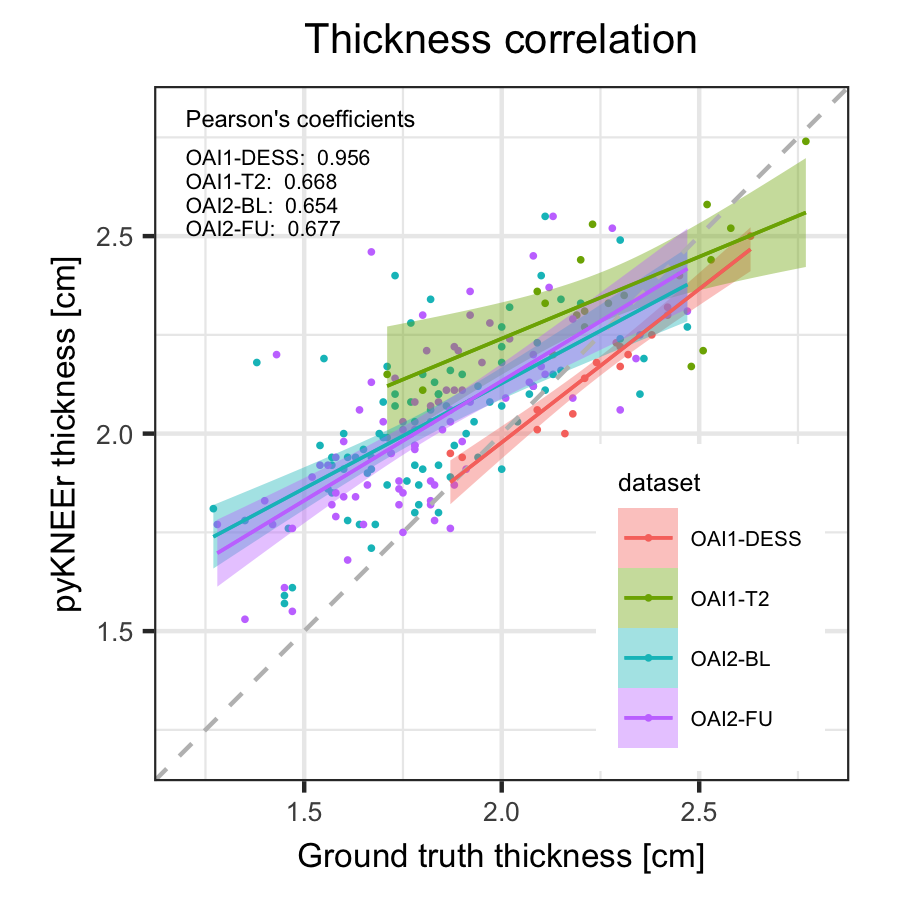

In [33]:
%%R -i thickness,pearsons_OAI1_DESS_th,pearsons_OAI1_T2_th,pearsons_OAI2_BL_th,pearsons_OAI2_FU_th  -w 3 -h 3 --units in -r 300
library(ggplot2)

plot_thickness <- (ggplot(thickness, aes(x=averageThickness_gt, y=averageThickness_pk, color=dataset)) +
                   # data
                   geom_point(size=0.2) +  
                   geom_smooth(aes(fill=dataset), method="lm", size=0.4) + # corr. line and confidence interval
                   geom_abline(intercept = 0, slope = 1, color="gray", linetype="dashed", size=0.5) + # line 1,0
                   stat_smooth(geom="line", method="lm", alpha=1, size=0.4) + # make line color stronger
                   # background
                   theme_bw() + # white background with grid lines
                   # graph ratio and limits
                   coord_fixed(ratio = 1, xlim = c(1.2,2.8), ylim = c(1.2,2.8)) + # ratio, xlim, and ylim  
                   # axis labels 
                   xlab("Ground truth thickness [cm]") +
                   ylab("pyKNEEr thickness [cm]") +
                   theme(text = element_text(size=label_font_size)) + 
                   # title
                   ggtitle("Thickness correlation") +
                   theme(plot.title = element_text(size=title_font_size, hjust = 0.5)) + # title font size + title to center
                   # legend 
                   theme(legend.position = c(0.8, 0.25)) + # legend position inside graph
                   theme(legend.title=element_text(size=legend_title_font_size), legend.text=element_text(size=legend_font_size)) + # text size
                   theme(legend.key.size = unit(0.2,"in")) + # legend size
                   # pearsons
                   annotate("text", x = 1.2, y = 2.8, label = "Pearson's coefficients", size=2, hjust = 0 )+
                   annotate("text", x = 1.2, y = 2.7, label = paste(c("OAI1-DESS: ", format(pearsons_OAI1_DESS_th, digits = 3)), collapse = " "), size=1.8, hjust = 0 ) +
                   annotate("text", x = 1.2, y = 2.64, label = paste(c("OAI1-T2: ",   format(pearsons_OAI1_T2_th, digits = 3)),  collapse = " "), size=1.8, hjust = 0 ) +
                   annotate("text", x = 1.2, y = 2.58, label = paste(c("OAI2-BL: ",   format(pearsons_OAI2_BL_th, digits = 3)),  collapse = " "), size=1.8, hjust = 0 ) +
                   annotate("text", x = 1.2, y = 2.52, label = paste(c("OAI2-FU: ",   format(pearsons_OAI2_FU_th, digits = 3)),  collapse = " "), size=1.8, hjust = 0 )
                  ) 
# display plot
plot_thickness

In [34]:
# save plot
# %%R
# ggsave("fig_thickness.pdf", plot = last_plot(), height=3, width=3, dpi=300)

___

## CARTILAGE VOLUME <a name="cartilageVolume"></a>

In [35]:
def get_volume(fileName, index_excluded):
       
    # load file
    volume = pd.read_csv(fileName)
    
    # start indeces from 1
    volume.index = np.arange(1,len(volume)+1)
        
    # remove the rows of failed segmentations and reference image 
    volume = volume.drop(index_excluded);
    
    return volume

### Load files

In [36]:
# OAI1 - DESS
filename_OAI1_DESS_v = "./volume_OAI1_DESS.csv"
volume_OAI1_DESS = get_volume(filename_OAI1_DESS_v, index_excluded_OAI1_DESS)
# OAI1 - DESS_QM (ground truth)
filename_OAI1_DESS_QM_v = "./volume_OAI1_DESS_QM.csv"
volume_OAI1_DESS_QM = get_volume(filename_OAI1_DESS_QM_v, index_excluded_OAI1_DESS)
# OAI1 - T2
filename_OAI1_T2_v = "./volume_OAI1_T2_0.csv"
volume_OAI1_T2 = get_volume(filename_OAI1_T2_v, index_excluded_OAI1_T2)
# OAI1 - T2_QM (ground truth)
filename_OAI1_T2_QM_v = "./volume_OAI1_T2_QM.csv"
volume_OAI1_T2_QM = get_volume(filename_OAI1_T2_QM_v, index_excluded_OAI1_T2)
# OAI2 - Baseline
filename_OAI2_BL_v = "./volume_OAI2_BL.csv"
volume_OAI2_BL = get_volume(filename_OAI2_BL_v, index_excluded_OAI2_BL)
# OAI2 - Baseline_IM (ground truth)
filename_OAI2_BL_IM_v = "./volume_OAI2_BL_IM.csv"
volume_OAI2_BL_IM = get_volume(filename_OAI2_BL_IM_v, index_excluded_OAI2_BL)
# OAI2 - Followup
filename_OAI2_FU_v = "./volume_OAI2_FU.csv"
volume_OAI2_FU = get_volume(filename_OAI2_FU_v, index_excluded_OAI2_FU)
# OAI2 - Followup_IM (ground truth)
filename_OAI2_FU_IM_v = "./volume_OAI2_FU_IM.csv"
volume_OAI2_FU_IM = get_volume(filename_OAI2_FU_IM_v, index_excluded_OAI2_FU)

### Descriptive statistics of cartilage volume

In [37]:
# change the column names for nicer display
volume_OAI1_DESS_disp = volume_OAI1_DESS.copy()
volume_OAI1_DESS_disp.rename(columns={"Volume": "OAI1_DESS"} , inplace=True) # rename column
volume_OAI1_DESS_QM_disp = volume_OAI1_DESS_QM.copy()
volume_OAI1_DESS_QM_disp.rename(columns={"Volume": "OAI1_DESS_QM"} , inplace=True) # rename column
volume_OAI1_T2_disp = volume_OAI1_T2.copy()
volume_OAI1_T2_disp.rename(columns={"Volume": "OAI1_T2"} , inplace=True) # rename column
volume_OAI1_T2_QM_disp = volume_OAI1_T2_QM.copy()
volume_OAI1_T2_QM_disp.rename(columns={"Volume": "OAI1_T2_QM"} , inplace=True) # rename column
volume_OAI2_BL_disp = volume_OAI2_BL.copy()
volume_OAI2_BL_disp.rename(columns={"Volume": "OAI2_BL"} , inplace=True) # rename column
volume_OAI2_BL_IM_disp = volume_OAI2_BL_IM.copy()
volume_OAI2_BL_IM_disp.rename(columns={"Volume": "OAI2_BL_IM"} , inplace=True) # rename column
volume_OAI2_FU_disp = volume_OAI2_FU.copy()
volume_OAI2_FU_disp.rename(columns={"Volume": "OAI2_FU"} , inplace=True) # rename column
volume_OAI2_FU_IM_disp = volume_OAI2_FU_IM.copy()
volume_OAI2_FU_IM_disp.rename(columns={"Volume": "OAI2_FU_IM"} , inplace=True) # rename column

In [38]:
display_side_by_side(volume_OAI1_DESS_disp.describe().round(2),
                     volume_OAI1_DESS_QM_disp.describe().round(2),
                     volume_OAI1_T2_disp.describe().round(2),
                     volume_OAI1_T2_QM_disp.describe().round(2))
display_side_by_side(volume_OAI2_BL_disp.describe().round(2),
                     volume_OAI2_BL_IM_disp.describe().round(2),
                     volume_OAI2_FU_disp.describe().round(2),
                     volume_OAI2_FU_IM_disp.describe().round(2))

,OAI1_DESS
count,17.00
mean,13074.65
std,1766.24
min,10399.00
25%,11633.00
50%,13440.00
75%,14028.00
max,16419.00
,OAI1_DESS_QM
count,17.00


,OAI2_BL
count,85.00
mean,11826.94
std,2785.47
min,6675.00
25%,9376.00
50%,11446.00
75%,13990.00
max,19225.00
,OAI2_BL_IM
count,85.00


### Correlation between analyzed data and ground truth data

In [39]:
def persons_coeff_v(volume_pk, volume_gt):
    
    # convert table columns to lists
    volume_pk_list = volume_pk["Volume"].tolist() # pk = pyKNEEr
    volume_gt_list = volume_gt["Volume"].tolist() # gt = ground truth

    # calculate Pearson's coefficient
    [pearsons, pvalue] = scipy.stats.pearsonr(volume_pk_list, volume_gt_list)
    print("Person's coefficient is %.2f" % round(pearsons,2))
    
    return pearsons

In [40]:
pearsons_OAI1_DESS_v = persons_coeff_v(volume_OAI1_DESS, volume_OAI1_DESS_QM)
pearsons_OAI1_T2_v   = persons_coeff_v(volume_OAI1_T2,   volume_OAI1_T2_QM)
pearsons_OAI2_BL_v   = persons_coeff_v(volume_OAI2_BL,   volume_OAI2_BL_IM)
pearsons_OAI2_FU_v   = persons_coeff_v(volume_OAI2_FU,   volume_OAI2_FU_IM)

Person's coefficient is 0.98
Person's coefficient is 0.85
Person's coefficient is 0.89
Person's coefficient is 0.88


### Visualization

In [41]:
# OAI1 - DESS
# add the column with the name of the dataset
volume_OAI1_DESS_vis    = volume_OAI1_DESS.copy()
volume_OAI1_DESS_vis.rename(columns={"Volume": "Volume_pk"} , inplace=True)
volume_OAI1_DESS_QM_vis = volume_OAI1_DESS_QM.copy()
volume_OAI1_DESS_QM_vis.rename(columns={"Volume": "Volume_gt"} , inplace=True)
# concatenate
OAI1_DESS = pd.concat([volume_OAI1_DESS_vis[["Volume_pk"]], volume_OAI1_DESS_QM_vis[["Volume_gt"]]], axis = 1)
# add label column
OAI1_DESS.insert(2, "dataset", "OAI1-DESS", allow_duplicates=False)

# OAI1 - T2
volume_OAI1_T2_vis = volume_OAI1_T2.copy()
volume_OAI1_T2_vis.rename(columns={"Volume": "Volume_pk"} , inplace=True)
volume_OAI1_T2_QM_vis = volume_OAI1_T2_QM.copy()
volume_OAI1_T2_QM_vis.rename(columns={"Volume": "Volume_gt"} , inplace=True)
OAI1_T2 = pd.concat([volume_OAI1_T2_vis[["Volume_pk"]], volume_OAI1_T2_QM_vis[["Volume_gt"]]], axis = 1)
OAI1_T2.insert(2, "dataset", "OAI1-T2", allow_duplicates=False)

# OAI2 - BL
volume_OAI2_BL_vis = volume_OAI2_BL.copy()
volume_OAI2_BL_vis.rename(columns={"Volume": "Volume_pk"} , inplace=True)
volume_OAI2_BL_IM_vis = volume_OAI2_BL_IM.copy()
volume_OAI2_BL_IM_vis.rename(columns={"Volume": "Volume_gt"} , inplace=True)
OAI2_BL = pd.concat([volume_OAI2_BL_vis[["Volume_pk"]], volume_OAI2_BL_IM_vis[["Volume_gt"]]], axis = 1)
OAI2_BL.insert(2, "dataset", "OAI2-BL", allow_duplicates=False)

# OAI2 - FU
volume_OAI2_FU_vis = volume_OAI2_FU.copy()
volume_OAI2_FU_vis.rename(columns={"Volume": "Volume_pk"} , inplace=True)
volume_OAI2_FU_IM_vis = volume_OAI2_FU_IM.copy()
volume_OAI2_FU_IM_vis.rename(columns={"Volume": "Volume_gt"} , inplace=True)
OAI2_FU = pd.concat([volume_OAI2_FU_vis[["Volume_pk"]], volume_OAI2_FU_IM_vis[["Volume_gt"]]], axis = 1)
OAI2_FU.insert(2, "dataset", "OAI2-FU", allow_duplicates=False)

volume = pd.concat([OAI1_DESS, OAI1_T2, OAI2_BL, OAI2_FU])

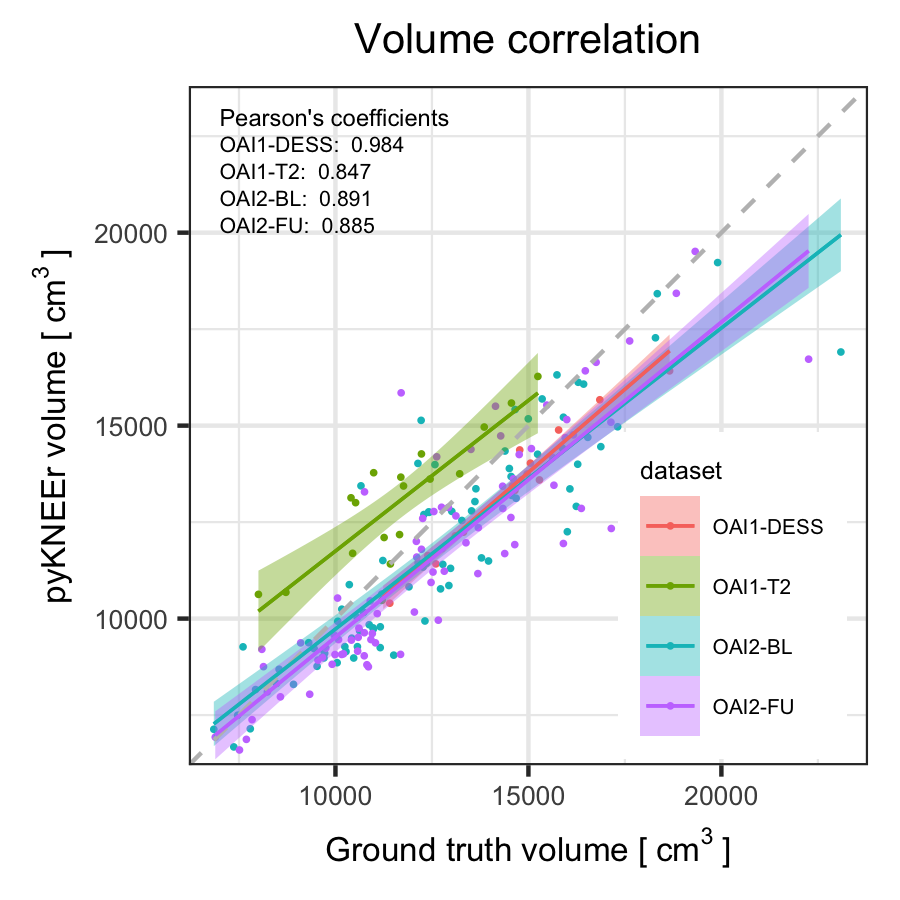

In [42]:
%%R -i volume,pearsons_OAI1_DESS_v,pearsons_OAI1_T2_v,pearsons_OAI2_BL_v,pearsons_OAI2_FU_v -w 3 -h 3 --units in -r 300
library(ggplot2)

plot_volume <- (ggplot(volume, aes(x=Volume_gt, y=Volume_pk, color=dataset)) +
                # data
                geom_point(size=0.2) +  
                geom_smooth(aes(fill=dataset), method="lm", size=0.4) + # corr. line and confidence interval
                geom_abline(intercept = 0, slope = 1, color="gray", linetype="dashed", size=0.5) + # line 1,0
                stat_smooth(geom="line", method="lm", alpha=1, size=0.4) + # make line color stronger
                # background
                theme_bw() + # white background with grid lines
                # graph ratio and limits
                coord_fixed(ratio = 1, xlim = c(7000,23000), ylim = c(7000,23000)) + # ratio, xlim, and ylim  
                # axis labels 
                xlab(expression("Ground truth volume ["~cm^{3}~"]")) +
                ylab(expression("pyKNEEr volume ["~cm^{3}~"]")) +
                theme(text = element_text(size=label_font_size)) + 
                # title
                ggtitle("Volume correlation") +
                theme(plot.title = element_text(size=title_font_size, hjust = 0.5)) + # title font size + title to center
                # legend 
                theme(legend.position = c(0.8, 0.25)) + # legend position inside graph
                theme(legend.title=element_text(size=legend_title_font_size), legend.text=element_text(size=legend_font_size)) + # text size
                theme(legend.key.size = unit(0.2,"in")) +  # legend size
                # pearsons
                annotate("text", x = 7000, y = 23000, label = "Pearson's coefficients", size=2, hjust = 0 )+
                annotate("text", x = 7000, y = 22300, label = paste(c("OAI1-DESS: ", format(pearsons_OAI1_DESS_v, digits = 3)), collapse = " "), size=1.8, hjust = 0 ) +
                annotate("text", x = 7000, y = 21600, label = paste(c("OAI1-T2: ",   format(pearsons_OAI1_T2_v, digits = 3)),  collapse = " "), size=1.8, hjust = 0 ) +
                annotate("text", x = 7000, y = 20900, label = paste(c("OAI2-BL: ",   format(pearsons_OAI2_BL_v, digits = 3)),  collapse = " "), size=1.8, hjust = 0 ) +
                annotate("text", x = 7000, y = 20200, label = paste(c("OAI2-FU: ",   format(pearsons_OAI2_FU_v, digits = 3)),  collapse = " "), size=1.8, hjust = 0 )

               ) 

# display plot
plot_volume

In [43]:
# save plot 
# %%R # comment if used in mybinder, uncomment if used locally
# ggsave("fig_volume.pdf", plot = last_plot(), height=3, width=3, dpi=300) # comment if used in mybinder, uncomment if used locally

---

## $T_{2}$ mapping <a name="T2mapping"></a>

In [44]:
def get_maps(fileName, index_excluded):
       
    # load file
    maps = pd.read_csv(fileName)
    
    # start indeces from 1
    maps.index = np.arange(1,len(maps)+1)
        
    # remove the rows of failed segmentations and reference image 
    maps = maps.drop(index_excluded);
    
    return maps

### Load files

In [45]:
# OAI1 - T2
filename_OAI1_T2 = "./exp_fit_aligned_OAI1_T2.csv"
T2_maps = get_maps(filename_OAI1_T2, index_excluded_OAI1_T2)
# OAI1 - T2_QM (ground truth)
filename_OAI1_T2_QM = "./exp_fit_aligned_OAI1_T2_QM.csv"
T2_maps_QM = get_volume(filename_OAI1_T2_QM, index_excluded_OAI1_T2)

### Descriptive statistics of T2 maps

In [46]:
# change the column names for nicer display
T2_maps_OAI1_disp = T2_maps.copy()
T2_maps_OAI1_disp.rename(columns={"average": "OAI1_T2"} , inplace=True) # rename column
T2_maps_OAI1_QM_disp = T2_maps_QM.copy()
T2_maps_OAI1_QM_disp.rename(columns={"average": "OAI1_T2_QM"} , inplace=True) # rename column

In [47]:
display_side_by_side(T2_maps_OAI1_disp.describe().round(2),
                     T2_maps_OAI1_QM_disp.describe().round(2))

,OAI1_T2,std.dev
count,18.00,18.00
mean,66.05,75.96
std,6.52,30.76
min,56.07,30.95
25%,61.98,54.07
50%,66.10,78.54
75%,70.11,96.86
max,83.23,133.25
,OAI1_T2_QM,std.dev
count,18.00,18.00


### Correlation between analyzed data and ground truth data

In [48]:
def persons_coeff_maps(maps_pk, maps_gt):
    
    # convert table columns to lists
    maps_pk_list = maps_pk["average"].tolist() # pk = pyKNEEr
    maps_gt_list = maps_gt["average"].tolist() # gt = ground truth

    # calculate Pearson's coefficient
    [pearsons, pvalue] = scipy.stats.pearsonr(maps_pk_list, maps_gt_list)
    print("Person's coefficient is %.2f" % round(pearsons,2))
    
    return pearsons

In [49]:
pearsons_OAI1_T2_maps = persons_coeff_maps (T2_maps, T2_maps_QM)

Person's coefficient is 0.51


### Visualization

In [50]:
# OAI1 - T2
map_OAI1_T2_vis = T2_maps.copy()
map_OAI1_T2_vis.rename(columns={"average": "T2_maps_pk"} , inplace=True)
map_OAI1_T2_QM_vis = T2_maps_QM.copy()
map_OAI1_T2_QM_vis.rename(columns={"average": "T2_maps_gt"} , inplace=True)
OAI1_T2 = pd.concat([map_OAI1_T2_vis[["T2_maps_pk"]], map_OAI1_T2_QM_vis[["T2_maps_gt"]]], axis = 1)
OAI1_T2.insert(2, "dataset", "OAI1-T2", allow_duplicates=False)
maps = pd.concat([OAI1_T2])
display (maps)

,T2_maps_pk,T2_maps_gt,dataset
1,62.74,53.56,OAI1-T2
2,83.23,66.46,OAI1-T2
3,67.21,54.98,OAI1-T2
4,69.53,61.38,OAI1-T2
5,57.80,55.01,OAI1-T2
7,71.51,75.31,OAI1-T2
8,65.33,54.57,OAI1-T2
9,61.44,56.60,OAI1-T2
10,70.84,55.60,OAI1-T2
11,63.84,69.31,OAI1-T2


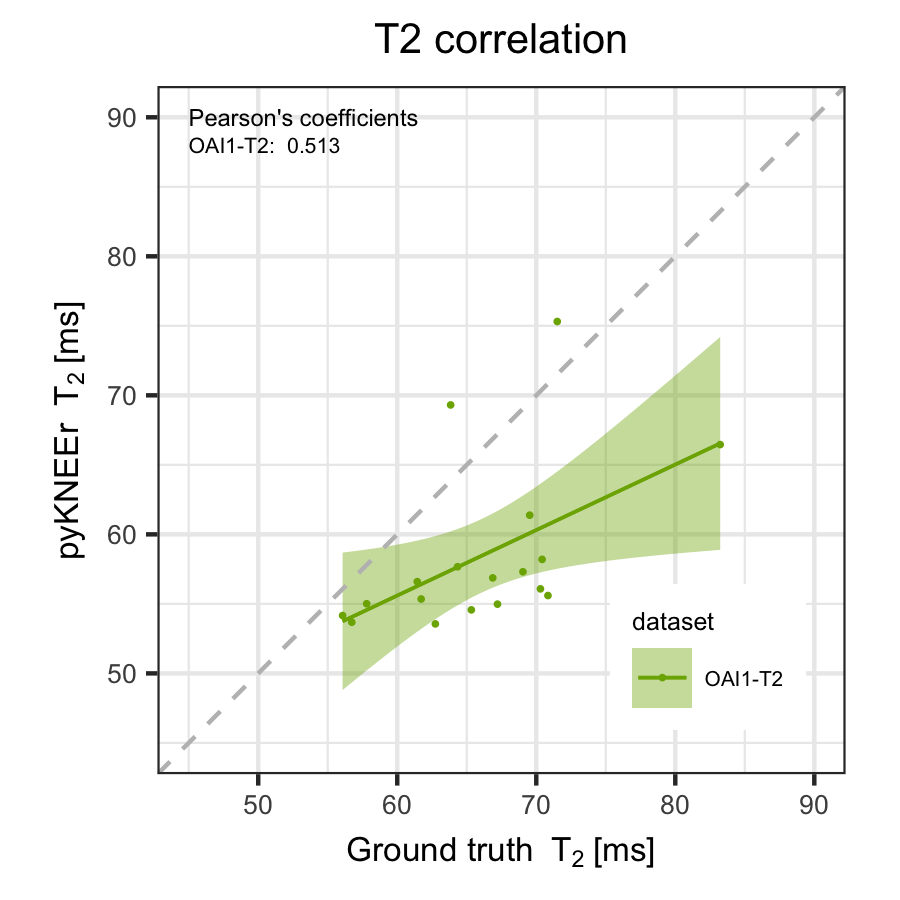

In [51]:
%%R -i maps,pearsons_OAI1_T2_maps -w 3 -h 3 --units in -r 300
library(ggplot2)

plot_T2_maps <- (ggplot(maps, aes(x=T2_maps_pk, y=T2_maps_gt, color=dataset)) +
                # data
                geom_point(size=0.2) +  
                geom_smooth(aes(fill=dataset), method="lm", size=0.4) + # corr. line and confidence interval
                geom_abline(intercept = 0, slope = 1, color="gray", linetype="dashed", size=0.5) + # line 1,0
                stat_smooth(geom="line", method="lm", alpha=1, size=0.4) + # make line color stronger
                # change color to OAI-T2 color in the previous graphs 
                scale_fill_manual(values = c("#7CAE00")) +  # colors used in the other correlation graphs for OAI1-T2
                scale_colour_manual(values = c("#7CAE00")) +
                # background
                theme_bw() + # white background with grid lines
                # graph ratio and limits
                coord_fixed(ratio = 1, xlim = c(45,90), ylim = c(45,90)) + # ratio, xlim, and ylim  
                # axis labels 
                xlab(expression("Ground truth " ~T[2] ~"[ms]")) +
                ylab(expression("pyKNEEr " ~T[2] ~"[ms]")) +
                theme(text = element_text(size=label_font_size)) + 
                # title
                ggtitle("T2 correlation") +
                theme(plot.title = element_text(size=title_font_size, hjust = 0.5)) + # title font size + title to center
                # legend 
                theme(legend.position = c(0.8, 0.17)) + # legend position inside graph
                theme(legend.title=element_text(size=legend_title_font_size), legend.text=element_text(size=legend_font_size)) + # text size
                theme(legend.key.size = unit(0.2,"in")) +  # legend size
                # pearsons
                annotate("text", x = 45, y = 90, label = "Pearson's coefficients", size=2, hjust = 0 )+
                annotate("text", x = 45, y = 88, label = paste(c("OAI1-T2: ", format(pearsons_OAI1_T2_maps, digits = 3)), collapse = " "), size=1.8, hjust = 0 ) 
               ) 

# display plot
plot_T2_maps

In [52]:
# save plot
# %%R
# ggsave("fig_T2.pdf", plot = last_plot(), height=3, width=3, dpi=300)

### Dependencies

In [53]:
%load_ext watermark
%watermark -v -m -p pykneer,numpy,pandas,scipy
print (" ")
%watermark -u -n -t -z

CPython 3.7.3
IPython 7.8.0

pykneer 0.0.4
numpy 1.15.1
pandas 0.23.4
scipy 1.1.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
 
last updated: Wed Oct 16 2019 09:55:17 CEST


In [54]:
%%R
sessionInfo()

R version 3.3.3 (2017-03-06)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.13.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggrepel_0.8.1 ggplot2_3.1.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       digest_0.6.18    withr_2.1.2      crayon_1.3.4    
 [5] dplyr_0.8.1      assertthat_0.2.1 grid_3.3.3       plyr_1.8.4      
 [9] R6_2.4.0         gtable_0.2.0     magrittr_1.5     scales_1.0.0    
[13] pillar_1.4.0     rlang_0.3.4      lazyeval_0.2.1   labeling_0.3    
[17] glue_1.3.1       purrr_0.3.2      munsell_0.5.0    pkgconfig_2.0.2 
[21] colorspace_1.3-2 tidyselect_0.2.5 tibble_2.1.1    
